In [113]:
import numpy as np
import pandas as pd
import feyn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from scipy.stats import pearsonr

In [114]:
#datamysirna = pd.read_excel('Mysirna_Data/1-s2.0-S1532046412000263-mmc4.xls', sheet_name='') Need "Whole ∆G"
data = pd.read_excel('iScore_data.xls')

In [115]:
data

,Dataset and number,Training for Biopredsi,Subset A1600,Subset A831,Authors,Gene,Accession number,"Antisense, 21 mer","Sense, 19 mer",% Inhibition,...,s-Biopredsi1600,ThermoComposition21,ThermoComposition19,DSIR,Reynolds,Ui-Tei,Amarzguioui,Katoh,Hsieh,Takasaki
0,A1,x,x,NaN,Huesken,TC10,BD135193,CUAAUAUGUUAAUUGAUUUau,AAAUCAAUUAACAUAUUAG,46.200000,...,0.699801,0.70,0.71,69.8,6,II,-1,95.410,0,-1.34
1,A2,x,x,NaN,Huesken,TC10,BD135193,AAUAUGUUAAUUGAUUUAUac,AUAAAUCAAUUAACAUAUU,38.400000,...,0.699815,0.78,0.80,71.4,9,II,1,104.177,2,-0.95
2,A3,NaN,x,NaN,Huesken,TC10,BD135193,GAUUUAUACAAUUCCUUUCaa,GAAAGGAAUUGUAUAAAUC,51.400000,...,0.765238,0.86,0.87,74.8,7,II,1,102.551,2,12.72
3,A4,x,x,NaN,Huesken,TC10,BD135193,CAAUUCCUUUCAAUUUUAUcu,AUAAAAUUGAAAGGAAUUG,36.400000,...,0.490108,0.64,0.69,56.7,5,II,-1,87.368,-1,-8.58
4,A5,x,NaN,x,Huesken,TC10,BD135193,CAGACCAAAAUUAAAUAAGaa,CUUAUUUAAUUUUGGUCUG,52.200000,...,0.653962,0.82,0.82,68.0,4,II,-1,79.582,-1,-1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,B415,NaN,NaN,NaN,Reynolds/Reynolds,Firefly Luc,U47298,UUUAUGAGGAUCUCUCUGAuu,UCAGAGAGAUCCUCAUAAA,92.129501,...,n.d.,0.89,0.88,90.7,9,II,1,82.209,1,-6.10
2846,B416,NaN,NaN,NaN,Reynolds/Khovorova,SEAP,NM_001632,GUUCUUGGCGGCUGUCUGUgc,ACAGACAGCCGCCAAGAAC,54.671411,...,n.d.,0.53,0.59,56.7,4,II,0,53.854,1,-6.32
2847,B417,NaN,NaN,NaN,Reynolds/Khovorova,SEAP,NM_001632,CCAUUCCUGCACCAGAUUCuu,GAAUCUGGUGCAGGAAUGG,56.459744,...,n.d.,0.61,0.59,65.5,4,II,-1,61.128,0,7.75
2848,B418,NaN,NaN,NaN,Reynolds/Khovorova,SEAP,NM_001632,CAUGUCUCCAGGCUCAAAGag,CUUUGAGCCUGGAGACAUG,79.004817,...,n.d.,0.79,0.78,70.9,4,II,1,72.011,1,2.73


In [116]:
data.columns.values

array(['Dataset and number', 'Training for Biopredsi', 'Subset A1600',
       'Subset A831', 'Authors', 'Gene', 'Accession number',
       'Antisense, 21 mer', 'Sense, 19 mer', '% Inhibition',
       'DG of secondary structure', 'Whole DG', 'GC Stertch', '%GC',
       "5' end DG", "3' end DG", 'i-Score', 'i-Score1600', 'Biopredsi',
       's-Biopredsi', 's-Biopredsi1600', 'ThermoComposition21',
       'ThermoComposition19', 'DSIR', 'Reynolds', 'Ui-Tei', 'Amarzguioui',
       'Katoh', 'Hsieh', 'Takasaki'], dtype=object)

In [117]:
data.shape

(2850, 30)

In [118]:
for n in range(19):
    data["pos{}".format(n+1)] = [data['Antisense, 21 mer'][i][n] for i in data.index]

for n in range(18):
    data["di{}".format(n+1)] = [data['Antisense, 21 mer'][i][n:(n+2)] for i in data.index]

    
data['ddG'] = data["5' end DG"]-data["3' end DG"]

#NCA + NGC + NGG
data["di_avoid"] = data['Antisense, 21 mer'].str.count("CA")+data['Antisense, 21 mer'].str.count("GC")+data['Antisense, 21 mer'].str.count("GG")

In [119]:
dataA = data[ (data['Subset A1600'] =='x') & (~data['DG of secondary structure'].isna())]
dataA

,Dataset and number,Training for Biopredsi,Subset A1600,Subset A831,Authors,Gene,Accession number,"Antisense, 21 mer","Sense, 19 mer",% Inhibition,...,di11,di12,di13,di14,di15,di16,di17,di18,ddG,di_avoid
0,A1,x,x,NaN,Huesken,TC10,BD135193,CUAAUAUGUUAAUUGAUUUau,AAAUCAAUUAACAUAUUAG,46.2,...,AA,AU,UU,UG,GA,AU,UU,UU,1.2,0
1,A2,x,x,NaN,Huesken,TC10,BD135193,AAUAUGUUAAUUGAUUUAUac,AUAAAUCAAUUAACAUAUU,38.4,...,UU,UG,GA,AU,UU,UU,UA,AU,-0.2,0
2,A3,NaN,x,NaN,Huesken,TC10,BD135193,GAUUUAUACAAUUCCUUUCaa,GAAAGGAAUUGUAUAAAUC,51.4,...,AU,UU,UC,CC,CU,UU,UU,UC,0.0,1
3,A4,x,x,NaN,Huesken,TC10,BD135193,CAAUUCCUUUCAAUUUUAUcu,AUAAAAUUGAAAGGAAUUG,36.4,...,CA,AA,AU,UU,UU,UU,UA,AU,1.0,2
6,A7,NaN,x,NaN,Huesken,TC10,BD135193,ACCAAAAUUAAAUAAGAAAgu,UUUCUUAUUUAAUUUUGGU,44.1,...,AA,AU,UA,AA,AG,GA,AA,AA,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,A2426,x,x,NaN,Huesken,P2RX3,NM_002559,GAGCCCUUCACCUUGGUUAcc,UAACCAAGGUGAAGGGCUC,16.2,...,CC,CU,UU,UG,GG,GU,UU,UA,1.1,3
2427,A2428,x,x,NaN,Huesken,P2RX3,NM_002559,GAUGAUCAGAAGCUGAACUac,AGUUCAGCUUCUGAUCAUC,72.3,...,AG,GC,CU,UG,GA,AA,AC,CU,0.3,2
2428,A2429,x,x,NaN,Huesken,P2RX3,NM_002559,AUCAGAAGCUGAACUACUCgg,GAGUAGUUCAGCUUCUGAU,91.8,...,GA,AA,AC,CU,UA,AC,CU,UC,-1.3,2
2429,A2430,x,x,NaN,Huesken,P2RX3,NM_002559,GAAGCUGAACUACUCGGUUga,AACCGAGUAGUUCAGCUUC,62.0,...,UA,AC,CU,UC,CG,GG,GU,UU,1.5,2


In [120]:
dataA2 = data[ (data['Subset A831'] =='x')  & (~data['DG of secondary structure'].isna())]
#dataA2

In [121]:
dataB = data[ (data['Subset A831'] !='x') & (data['Subset A1600'] !='x') & (~data['DG of secondary structure'].isna())]
dataB

,Dataset and number,Training for Biopredsi,Subset A1600,Subset A831,Authors,Gene,Accession number,"Antisense, 21 mer","Sense, 19 mer",% Inhibition,...,di11,di12,di13,di14,di15,di16,di17,di18,ddG,di_avoid
2431,B1,NaN,NaN,NaN,Harborth,Lamin A,AH001498,GAGCUCCUGCAGGUCCUCCuu,GGAGGACCUGCAGGAGCUC,83.000000,...,AG,GG,GU,UC,CC,CU,UC,CC,-0.9,4
2432,B2,NaN,NaN,NaN,Harborth,Lamin A,AH001498,AUUGAGCUCCUGCAGGUCCuc,GGACCUGCAGGAGCUCAAU,45.000000,...,UG,GC,CA,AG,GG,GU,UC,CC,-2.2,4
2433,B3,NaN,NaN,NaN,Harborth,Lamin A,AH001498,CCUCGCGGCUGACCACCUCuu,GAGGUGGUCAGCCGCGAGG,80.000000,...,GA,AC,CC,CA,AC,CC,CU,UC,0.9,4
2434,B4,NaN,NaN,NaN,Harborth,Lamin A,AH001498,CGCUUCUCACUGAGAGCAGug,CUGCUCUCAGUGAGAAGCG,88.000000,...,UG,GA,AG,GA,AG,GC,CA,AG,0.3,4
2435,B5,NaN,NaN,NaN,Harborth,Lamin A,AH001498,UGUUCUUCUGGAAGUCCAGuu,CUGGACUUCCAGAAGAACA,98.000000,...,GA,AA,AG,GU,UC,CC,CA,AG,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,B414,NaN,NaN,NaN,Ui-Tei/Reynolds,Firefly Luc,U47298,UGAUUUUUCUUGCGUCGAGuu,CUCGACGCAAGAAAAAUCA,91.050000,...,UG,GC,CG,GU,UC,CG,GA,AG,0.0,1
2845,B415,NaN,NaN,NaN,Reynolds/Reynolds,Firefly Luc,U47298,UUUAUGAGGAUCUCUCUGAuu,UCAGAGAGAUCCUCAUAAA,92.129501,...,UC,CU,UC,CU,UC,CU,UG,GA,-1.5,1
2847,B417,NaN,NaN,NaN,Reynolds/Khovorova,SEAP,NM_001632,CCAUUCCUGCACCAGAUUCuu,GAAUCUGGUGCAGGAAUGG,56.459744,...,AC,CC,CA,AG,GA,AU,UU,UC,0.9,4
2848,B418,NaN,NaN,NaN,Reynolds/Khovorova,SEAP,NM_001632,CAUGUCUCCAGGCUCAAAGag,CUUUGAGCCUGGAGACAUG,79.004817,...,GG,GC,CU,UC,CA,AA,AA,AG,0.0,5


In [122]:
dataA = dataA.drop(dataA.iloc[:, 0:9], axis=1)
dataA

,% Inhibition,DG of secondary structure,Whole DG,GC Stertch,%GC,5' end DG,3' end DG,i-Score,i-Score1600,Biopredsi,...,di11,di12,di13,di14,di15,di16,di17,di18,ddG,di_avoid
0,46.2,2.1,-24.6,1,15.789474,-0.9,-2.1,57.002482,55.8593,0.712,...,AA,AU,UU,UG,GA,AU,UU,UU,1.2,0
1,38.4,2.5,-23.6,1,10.526316,-1.1,-0.9,65.339036,64.2452,0.69,...,UU,UG,GA,AU,UU,UU,UA,AU,-0.2,0
2,51.4,2.3,-28.2,2,26.315789,-2.4,-2.4,61.513209,61.3256,0.736,...,AU,UU,UC,CC,CU,UU,UU,UC,0.0,1
3,36.4,1.3,-26.2,2,21.052632,-1.1,-2.1,44.513031,44.0352,0.496,...,CA,AA,AU,UU,UU,UU,UA,AU,1.0,2
6,44.1,2.8,-25.0,2,15.789474,-0.9,-2.2,48.634803,46.5212,0.618,...,AA,AU,UA,AA,AG,GA,AA,AA,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,16.2,-1.0,-40.3,4,52.631579,-1.3,-2.4,40.545678,37.3805,0.343,...,CC,CU,UU,UG,GG,GU,UU,UA,1.1,3
2427,72.3,-1.2,-36.3,2,42.105263,-2.1,-2.4,48.124916,47.6311,0.491,...,AG,GC,CU,UG,GA,AA,AC,CU,0.3,2
2428,91.8,-1.2,-36.3,2,42.105263,-2.4,-1.1,62.300497,61.21,0.807,...,GA,AA,AC,CU,UA,AC,CU,UC,-1.3,2
2429,62.0,-0.9,-37.4,3,47.368421,-0.9,-2.4,43.033110,42.0757,0.482,...,UA,AC,CU,UC,CG,GG,GU,UU,1.5,2


In [123]:
dataA = dataA.drop(dataA.iloc[:, 7:21], axis=1)
dataA

,% Inhibition,DG of secondary structure,Whole DG,GC Stertch,%GC,5' end DG,3' end DG,pos1,pos2,pos3,...,di11,di12,di13,di14,di15,di16,di17,di18,ddG,di_avoid
0,46.2,2.1,-24.6,1,15.789474,-0.9,-2.1,C,U,A,...,AA,AU,UU,UG,GA,AU,UU,UU,1.2,0
1,38.4,2.5,-23.6,1,10.526316,-1.1,-0.9,A,A,U,...,UU,UG,GA,AU,UU,UU,UA,AU,-0.2,0
2,51.4,2.3,-28.2,2,26.315789,-2.4,-2.4,G,A,U,...,AU,UU,UC,CC,CU,UU,UU,UC,0.0,1
3,36.4,1.3,-26.2,2,21.052632,-1.1,-2.1,C,A,A,...,CA,AA,AU,UU,UU,UU,UA,AU,1.0,2
6,44.1,2.8,-25.0,2,15.789474,-0.9,-2.2,A,C,C,...,AA,AU,UA,AA,AG,GA,AA,AA,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,16.2,-1.0,-40.3,4,52.631579,-1.3,-2.4,G,A,G,...,CC,CU,UU,UG,GG,GU,UU,UA,1.1,3
2427,72.3,-1.2,-36.3,2,42.105263,-2.1,-2.4,G,A,U,...,AG,GC,CU,UG,GA,AA,AC,CU,0.3,2
2428,91.8,-1.2,-36.3,2,42.105263,-2.4,-1.1,A,U,C,...,GA,AA,AC,CU,UA,AC,CU,UC,-1.3,2
2429,62.0,-0.9,-37.4,3,47.368421,-0.9,-2.4,G,A,A,...,UA,AC,CU,UC,CG,GG,GU,UU,1.5,2


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

(array([  6.,  16., 100., 245., 342., 389., 328., 123.,  31.,   6.]),
 array([  0.2 ,  13.59,  26.98,  40.37,  53.76,  67.15,  80.54,  93.93,
        107.32, 120.71, 134.1 ]),
 <a list of 10 Patch objects>)

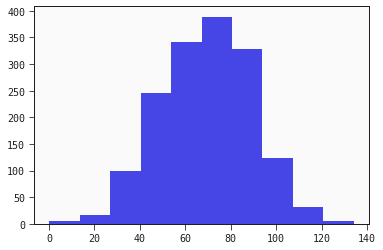

In [139]:
plt.hist(dataA['% Inhibition'])

In [146]:
ql = feyn.connect_qlattice()
ql.reset()

stypes = {}

for col in dataA.columns:
    if dataA[col].dtype == 'O':
        stypes[col] = 'c'
#qgraph = qgraph.filter(MaxEdges(15)).filter(Contains(['Whole DG']))
#qgraph = qgraph.filter(ExcludeFunctions([ 'gaussian', 'squared','exp']))

In [147]:
models = ql.auto_run(dataA, 
                     output_name='% Inhibition', 
                     kind='regression',
                     stypes=stypes,
                     criterion='bic'
         )

In [148]:
models[0].plot(dataA, dataB)

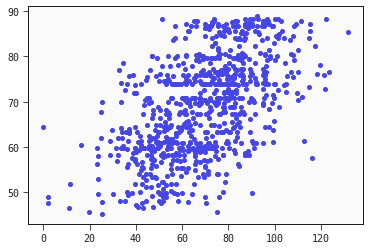

In [112]:
plt.scatter(dataA2['% Inhibition'],qgraph[0].predict(dataA2))

In [51]:
def ROC_plots(datain, lim=50, ax=None, titlein=''):
    feyn.plots.plot_roc_curve(datain['% Inhibition'] > lim, qgraph[0].predict(datain), ax=ax,label='hej')
    feyn.plots.plot_roc_curve(datain['% Inhibition'] > lim, datain['i-Score'], ax=ax)
    feyn.plots.plot_roc_curve(datain['% Inhibition'] > lim,datain.ThermoComposition19*100,  ax=ax)
    if ax:
        ax.set_title(titlein+'limit at % inhibition >'+str(lim))

<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

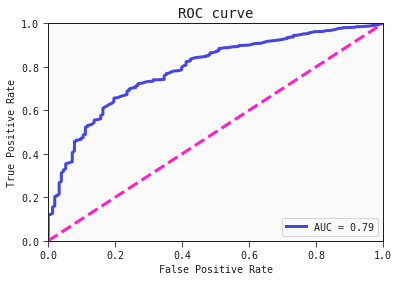

In [52]:
feyn.plots.plot_roc_curve(y_true=dataA2['% Inhibition'] > 50, y_pred=qgraph[0].predict(dataA2))

In [53]:

def R_plots(datain):
    x = datain['% Inhibition']
    iScore = datain['i-Score']
    ThermoComposition19 = datain.ThermoComposition19*100
    QL = qgraph[0].predict(datain)
    r2_iS = r2_score(x, iScore) 
    r2_T = r2_score(x,ThermoComposition19)
    r2_QL = r2_score(x,QL)
    R_iS, _ = pearsonr(x, iScore)
    R_T, _ = pearsonr(x,ThermoComposition19)
    R_QL, _ = pearsonr(x,QL)
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    axs[0].scatter(x, iScore)
    axs[0].set_title("iScore: R^2="+str(format(r2_iS, '.2f'))+', R='+str(format(R_iS, '.3f')))
    axs[0].set(xlabel ='%inhibition',ylabel ='iScore predict')

    axs[1].scatter(x,ThermoComposition19 )
    axs[1].set_title("ThermoComposition19 : R^2="+str(format(r2_T, '.2f'))+', R='+str(format(R_T, '.3f')) )
    axs[1].set(xlabel ='%inhibition',ylabel ='ThermoComposition predict')

    axs[2].scatter(x,QL )
    axs[2].set_title("QLattice : R^2="+str(format(r2_QL, '.2f'))+', R='+str(format(R_QL, '.3f')) )
    axs[2].set(xlabel ='%inhibition',ylabel ='QLattice predict')

    fig.tight_layout()

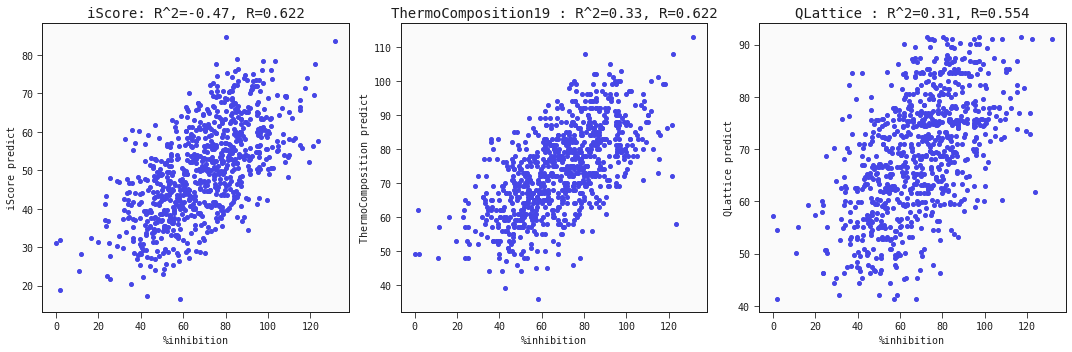

In [55]:
R_plots(dataA2)

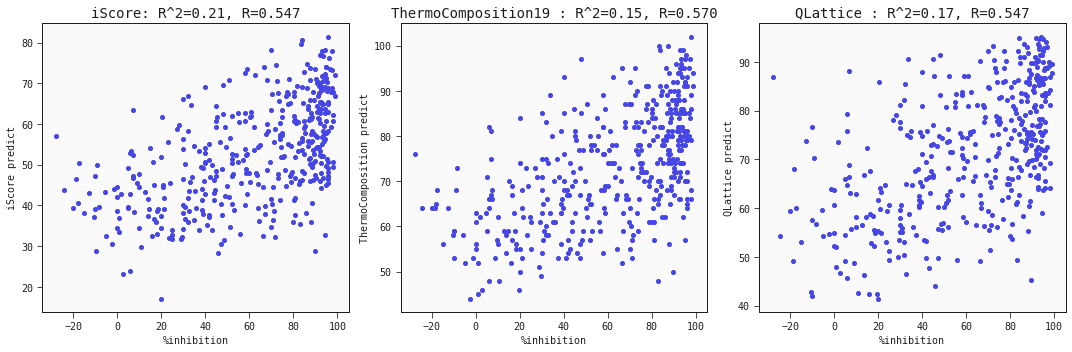

In [75]:
R_plots(dataB)

In [66]:
qgraph[0].features

['pos7', 'pos2', 'pos19', 'pos1']

In [69]:
tmp = pd.DataFrame(qgraph[0][1].state.categories)
tmp.sort_values(by=1)


,0,1
2,U,-0.075848
0,A,-0.061614
3,G,0.116298
1,C,0.135360


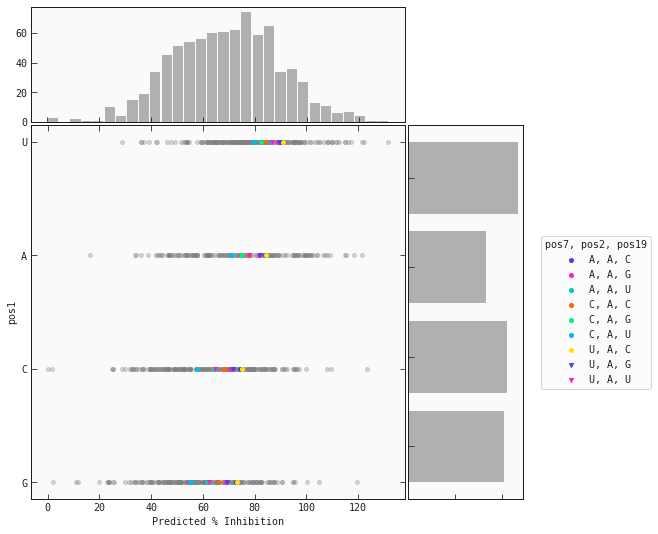

In [59]:
qgraph[0].plot_partial(dataA2, by='pos1', fixed={'pos2':'A'})

In [26]:
dataA.di1.value_counts()

GG    130
UU    129
UG    127
UC    117
AU    109
CA    105
GA    104
CU    102
GU    100
CC     99
GC     94
AG     93
AA     83
UA     74
AC     68
CG     52
Name: di1, dtype: int64

In [27]:
best_graph = qgraph[0]

In [28]:
tmp = best_graph[0].state.categories
tmp.sort(key=lambda x: x[1])

In [493]:
tmp

[('CC', -0.14409257586153884),
 ('GC', -0.0966543934882545),
 ('UC', -0.08955965196193036),
 ('GG', -0.08026496387721115),
 ('CG', -0.0757139048942701),
 ('AC', -0.06826893020924726),
 ('UG', -0.05422080818711339),
 ('CU', -0.052294530719914974),
 ('AG', -0.005252180979980348),
 ('GU', 0.002848256222046386),
 ('CA', 0.02629606768392653),
 ('GA', 0.06545313674140242),
 ('UA', 0.09037702763572104),
 ('UU', 0.09194633709149116),
 ('AU', 0.10005929217015455),
 ('AA', 0.15583596110983305)]